In [133]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
proj = pd.read_csv('/Users/sowmy/Documents/JigsawAcad/CapstonProject_1/projects.csv/projects.csv')
outc = pd.read_csv('/Users/sowmy/Documents/JigsawAcad/CapstonProject_1/outcomes.csv/outcomes.csv')
essa = pd.read_csv('/Users/sowmy/Documents/JigsawAcad/CapstonProject_1/essays.csv/essays.csv')

In [4]:
proj.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [8]:
#converting to datetime
proj.date_posted = pd.to_datetime(proj['date_posted'])

In [9]:
proj.date_posted.max()

Timestamp('2014-05-12 00:00:00')

In [10]:
proj.shape

(664098, 35)

In [11]:
proj.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')

In [12]:
proj.isnull().sum()

projectid                                      0
teacher_acctid                                 0
schoolid                                       0
school_ncesid                              42736
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     4
school_metro                               81908
school_district                              948
school_county                                 17
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_prefix                                 4
teacher_teach_for_america                      0
teacher_ny_teaching_

In [13]:
essa.head()

,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,It is imperative that teachers bring technolog...,My students need four iPods.,I am a fourth year fifth grade math teacher. T...
1,ffffac55ee02a49d1abc87ba6fc61135,947066d0af47e0566f334566553dd6a6,Recording Rockin' Readers,Can you imagine having to translate everything...,My students need a camcorder.,Can you imagine having to translate everything...
2,ffff97ed93720407d70a2787475932b0,462270f5d5c212162fcab11afa2623cb,Kindergarten In Need of Important Materials!,It takes a special person to donate to a group...,My students need 17 assorted classroom materia...,Hi. I teach a wonderful group of 4-5 year old ...
3,ffff7266778f71242675416e600b94e1,b9a8f14199e0d8109200ece179281f4f,Let's Find Out!,My Kindergarten students come from a variety o...,"My students need 25 copies of Scholastic's ""Le...",My Kindergarten students come from a variety o...
4,ffff418bb42fad24347527ad96100f81,e885fb002a1d0d39aaed9d21a7683549,Whistle While We Work!,"By using the cross curricular games requested,...",My students need grade level appropriate games...,All work and no play makes school a dull place...


In [14]:
essa.shape

(664098, 6)

In [15]:
essa = essa.fillna('null')

In [16]:
outc.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [17]:
outc.isnull().sum()

projectid                                              0
is_exciting                                            0
at_least_1_teacher_referred_donor                  94398
fully_funded                                           0
at_least_1_green_donation                          94398
great_chat                                             0
three_or_more_non_teacher_referred_donors          94398
one_non_teacher_referred_donor_giving_100_plus     94398
donation_from_thoughtful_donor                     94398
great_messages_proportion                         179839
teacher_referred_count                             94398
non_teacher_referred_count                         94398
dtype: int64

In [18]:
outc.shape

(619326, 12)

In [19]:
#droping columns
outc.drop(columns=['at_least_1_teacher_referred_donor','at_least_1_teacher_referred_donor',
     'at_least_1_green_donation','three_or_more_non_teacher_referred_donors',
    'one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor',
     'great_messages_proportion','teacher_referred_count','non_teacher_referred_count','fully_funded','great_chat'], inplace=True)

In [20]:
outc.head()

,projectid,is_exciting
0,ffffc4f85b60efc5b52347df489d0238,f
1,ffffac55ee02a49d1abc87ba6fc61135,f
2,ffff97ed93720407d70a2787475932b0,f
3,ffff418bb42fad24347527ad96100f81,f
4,ffff2d9c769c8fb5335e949c615425eb,t


In [21]:
outc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619326 entries, 0 to 619325
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   projectid    619326 non-null  object
 1   is_exciting  619326 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB


In [22]:
#merging data_proj and data_essa dataframes
data = pd.merge(proj, essa)


In [23]:
data.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,555.81,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,296.47,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,430.89,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,576.07,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,408.40,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...


In [24]:
data.shape

(664098, 39)

In [25]:
data.date_posted.max()

Timestamp('2014-05-12 00:00:00')

In [26]:
#merging data and data_outc
doch = pd.merge(data,outc, on='projectid', how='left')

In [27]:
doch.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...,NaN
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...,NaN
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...,NaN
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...,NaN


In [28]:
doch.shape

(664098, 40)

In [29]:
doch.date_posted.max()

Timestamp('2014-05-12 00:00:00')

In [30]:
doch.isnull().sum()

projectid                                      0
teacher_acctid                                 0
schoolid                                       0
school_ncesid                              42736
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     4
school_metro                               81908
school_district                              948
school_county                                 17
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_prefix                                 4
teacher_teach_for_america                      0
teacher_ny_teaching_

In [31]:
#Spliting data into  train and test set according to date 
train = doch[doch['date_posted'] <='2014-01-01']
test = doch[doch['date_posted']>='2014-01-01']


In [32]:
train.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
44405,bb085d3e4e07deeff4992ca2eb4d1bce,e8f9a695f9e07f94a66408c6ef1960dd,20331a9c4068c933774735311861fd9c,3.600078e+11,40.774338,-73.984751,New York,NY,10023.0,urban,...,908.45,100.0,f,f,2014-01-01,Technology - Like Jumping Through The Rabbit's...,Ever have that sinking feeling when the copy m...,My students need a laptop Chromebook computer ...,Ever have that sinking feeling when the copy m...,NaN
44406,cc06856f0e48ca63b529352abf4203fd,bcb9c8fcacb7ff431ba73d002b0e7d75,b74ff738ff6dff9943701adbaac7efc7,3.600078e+11,40.773753,-73.985376,New York,NY,10023.0,urban,...,545.14,198.0,f,f,2014-01-01,We Need Bunsen Burners!,The lab is where science comes to life and stu...,My students need 17 Bunsen burners for our lab...,The lab is where science comes to life and stu...,NaN
44407,ae1d159a475fcd677f12c964bf8e3d24,0e19db1513a0c79b954c9b6deab0a3ec,8be9741df5fca4a18c9786a2e924e6dc,5.063300e+10,35.351376,-94.340373,Fort Smith,AR,72903.0,urban,...,488.39,28.0,t,f,2014-01-01,Teaching Econ Through Technology,How bored do you get just sitting in a desk an...,My students need an iPad mini with cover!,How bored do you get just sitting in a desk an...,NaN
44408,c4d5660b590be04fbce7448581152150,da18d82137b7b748b62c0663ba981fd6,3f84ab7c50ec28a525a4ca895c501f5b,2.744190e+11,46.617071,-92.382084,Wrenshall,MN,55797.0,rural,...,228.49,15.0,f,f,2014-01-01,Shaken' It Up With Shuffles!,"Recently, during a workshop, I was given a par...",My students need three iPod shuffles to rejuve...,"Recently, during a workshop, I was given a par...",NaN
44409,ab9306f017a1866836db431ed4110f25,085c3acfa53bc13ea2d5b0752c523df8,a2da3241bccb97ea967039fe12734cc7,2.200125e+11,30.515228,-90.992871,Greenwel Spgs,LA,70739.0,NaN,...,354.92,21.0,f,f,2014-01-01,No Habla Ingles,Successful completion of kindergarten includes...,My students need 2 sets of realistic photo car...,Successful completion of kindergarten includes...,NaN


In [33]:
test.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...,NaN
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...,NaN
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...,NaN
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...,NaN


In [34]:
test.shape

(44772, 40)

In [35]:
train.isnull().sum()

projectid                                      0
teacher_acctid                                 0
schoolid                                       0
school_ncesid                              38874
school_latitude                                0
school_longitude                               0
school_city                                    0
school_state                                   0
school_zip                                     4
school_metro                               75547
school_district                              922
school_county                                 17
school_charter                                 0
school_magnet                                  0
school_year_round                              0
school_nlns                                    0
school_kipp                                    0
school_charter_ready_promise                   0
teacher_prefix                                 0
teacher_teach_for_america                      0
teacher_ny_teaching_

In [36]:
print(train.school_ncesid.value_counts())

1.709930e+11    904
3.600120e+11    829
3.600153e+11    690
3.600097e+11    667
6.162300e+10    629
               ... 
4.820960e+11      1
4.823910e+11      1
1.201080e+11      1
1.600930e+11      1
2.502520e+11      1
Name: school_ncesid, Length: 50752, dtype: int64


In [37]:
#filling values with most occur values
train.school_ncesid = train.school_ncesid.fillna(1.709930e+11)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
train.school_state.value_counts()

CA    118555
NY     69865
NC     41218
IL     37938
TX     37220
FL     28055
SC     17592
IN     16051
OK     14103
GA     13755
PA     13305
TN     13279
LA     11664
MO     11280
MI     11029
VA      9872
WA      9722
MD      8972
AZ      8949
NJ      8812
UT      8707
MA      8525
NV      8333
CT      7150
OH      7021
DC      6651
MS      6622
CO      6482
WI      6434
OR      6213
AR      5251
AL      5139
MN      4140
KY      4077
ME      3165
IA      2982
KS      2669
NM      2414
HI      2342
WV      2149
RI      1987
ID      1707
DE      1464
NE      1438
NH      1302
AK      1229
SD       889
MT       649
VT       501
ND       436
WY       386
La         3
Name: school_state, dtype: int64

In [40]:
train.school_zip.value_counts()

10456.0    1985
10457.0    1615
60609.0    1579
10451.0    1566
90011.0    1543
           ... 
8741.0        1
16046.0       1
92365.0       1
1106.0        1
9001.0        1
Name: school_zip, Length: 16315, dtype: int64

In [41]:
#filling values with most occured zip code
train.school_zip = train.school_zip.fillna(10456.0)

In [42]:
train.school_metro.value_counts()


urban       328914
suburban    140885
rural        74347
Name: school_metro, dtype: int64

In [43]:
#filling values with most occured values
train.school_metro = train.school_metro.fillna('urban')

In [44]:
train.school_district.value_counts()


New York City Dept Of Ed          53294
Los Angeles Unif Sch Dist         38126
Charlotte-mecklenburg Sch Dist     8336
Clark Co School District           7528
Hillsborough Co Pub Sch Dist       7288
                                  ...  
Selmaville Cmty Cons SD 10            1
Argyle Central School Dist            1
School Administrative Unit 6          1
Hanover Horton Sch Dist               1
Dalton Nunda Central SD               1
Name: school_district, Length: 9043, dtype: int64

In [45]:
#filling values with most occured values
train.school_district = train.school_district.fillna("New York City Dept Of Ed")

In [46]:
train.school_county.value_counts()

Los Angeles             47555
Cook                    30067
Kings (Brooklyn)        18631
Bronx                   17492
New York (Manhattan)    13351
                        ...  
Irwin                       1
Crockett                    1
Concho                      1
Lanier                      1
Sierra                      1
Name: school_county, Length: 1689, dtype: int64

In [47]:
#filling values with most occured values
train.school_county = train.school_county.fillna("Los Angeles")

In [48]:
train.primary_focus_subject.value_counts()

Literacy                 188717
Literature & Writing      76929
Mathematics               74696
Special Needs             39035
Applied Sciences          29095
Visual Arts               28778
Environmental Science     24942
Health & Life Science     23048
Music                     19261
History & Geography       15987
Early Development         13228
Other                     12793
Social Sciences            9642
ESL                        9207
Character Education        9170
Performing Arts            7942
Gym & Fitness              6494
Health & Wellness          5996
College & Career Prep      5955
Foreign Languages          5117
Sports                     3291
Extracurricular            2907
Civics & Government        2332
Economics                  1494
Community Service          1394
Parent Involvement         1219
Nutrition                   988
Name: primary_focus_subject, dtype: int64

In [49]:
#filling values with most occured values
train.primary_focus_subject = train.primary_focus_subject.fillna("Literacy")

In [50]:
train.primary_focus_area.value_counts()

Literacy & Language    279970
Math & Science         151781
Music & The Arts        55981
Applied Learning        46666
Special Needs           39035
History & Civics        29455
Health & Sports         16769
Name: primary_focus_area, dtype: int64

In [51]:
#filling values with most occured values
train.primary_focus_area = train.primary_focus_area.fillna("Literacy & Language")

In [52]:
train.resource_type.value_counts()

Supplies      214309
Technology    200162
Books         134282
Other          65218
Trips           4769
Visitors         910
Name: resource_type, dtype: int64

In [53]:
#filling values with most occured values
train.resource_type = train.resource_type.fillna("supplies")

In [54]:
train.grade_level.value_counts()

Grades PreK-2    228884
Grades 3-5       190812
Grades 6-8       107010
Grades 9-12       92980
Name: grade_level, dtype: int64

In [55]:
#filling values with most occured values
train.grade_level = train.grade_level.fillna("Grades PreK-2")

In [56]:
train.secondary_focus_subject.value_counts()

Literature & Writing     65252
Literacy                 61697
Mathematics              50950
Special Needs            26823
ESL                      23089
Early Development        19460
Health & Life Science    17996
Applied Sciences         16903
Environmental Science    15955
History & Geography      15592
Visual Arts              13651
Performing Arts          12952
Social Sciences          12434
Other                    11160
Character Education      10832
College & Career Prep     9490
Health & Wellness         6930
Music                     6761
Extracurricular           5278
Parent Involvement        4189
Civics & Government       4013
Gym & Fitness             3442
Community Service         2878
Sports                    2700
Foreign Languages         2056
Economics                 1827
Nutrition                 1314
Name: secondary_focus_subject, dtype: int64

In [57]:
#filling values with most occured values
train.secondary_focus_subject = train.secondary_focus_subject.fillna('Literature & Writing')

In [58]:
train.secondary_focus_area.value_counts()

Literacy & Language    152094
Math & Science         101804
Applied Learning        63287
History & Civics        33866
Music & The Arts        33364
Special Needs           26823
Health & Sports         14386
Name: secondary_focus_area, dtype: int64

In [59]:
#filling values with most occured values
train.secondary_focus_area = train.secondary_focus_area.fillna('Literacy & Language')

In [60]:
#filling values with mean value
train.fulfillment_labor_materials = train.fulfillment_labor_materials.fillna(train.fulfillment_labor_materials.mean())

In [61]:
#filling values with most occured values
train.students_reached = train.students_reached.fillna(train.students_reached.mean())

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619693 entries, 44405 to 664097
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   projectid                               619693 non-null  object        
 1   teacher_acctid                          619693 non-null  object        
 2   schoolid                                619693 non-null  object        
 3   school_ncesid                           619693 non-null  float64       
 4   school_latitude                         619693 non-null  float64       
 5   school_longitude                        619693 non-null  float64       
 6   school_city                             619693 non-null  object        
 7   school_state                            619693 non-null  object        
 8   school_zip                              619693 non-null  float64       
 9   school_metro                     

In [64]:
train['is_exciting'] = train['is_exciting'].fillna('f')

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
#label encoding for object data type
enc = LabelEncoder()
train['is_exciting'] = (enc.fit_transform(train['is_exciting']))

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
train['school_metro'] = (enc.fit_transform(train['school_metro']))
train['school_magnet'] = (enc.fit_transform(train['school_magnet']))
train['school_state'] = (enc.fit_transform(train['school_state']))
train['school_charter'] = (enc.fit_transform(train['school_charter']))
train['primary_focus_subject'] = (enc.fit_transform(train['primary_focus_subject']))
train['primary_focus_area'] = (enc.fit_transform(train['primary_focus_area']))
train['secondary_focus_subject'] = (enc.fit_transform(train['secondary_focus_subject']))
train['grade_level'] = (enc.fit_transform(train['grade_level']))

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [67]:
#checking correlation for train dataset
train.corr()

,school_ncesid,school_latitude,school_longitude,school_state,school_zip,school_metro,school_charter,school_magnet,primary_focus_subject,primary_focus_area,secondary_focus_subject,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,is_exciting
school_ncesid,1.000000,0.185431,0.409019,0.954247,-0.352839,-0.069597,-0.160938,-0.045202,-0.005869,-0.009746,0.000951,-0.009471,-0.077623,-0.000590,-0.000483,0.001988,-0.015358
school_latitude,0.185431,1.000000,0.143962,0.210187,-0.193974,0.119969,-0.022337,0.035199,0.024360,0.000651,0.024976,0.001758,-0.071431,0.000346,0.000419,-0.002583,0.021964
school_longitude,0.409019,0.143962,1.000000,0.416806,-0.937184,-0.007354,-0.051335,0.037302,0.009355,-0.012768,0.030660,-0.005901,-0.109741,-0.000815,-0.000647,0.000308,-0.003731
school_state,0.954247,0.210187,0.416806,1.000000,-0.362794,-0.043160,-0.093418,-0.055685,-0.000767,-0.006509,0.002769,-0.010341,-0.073179,-0.000265,-0.000167,0.001797,-0.011081
school_zip,-0.352839,-0.193974,-0.937184,-0.362794,1.000000,-0.008137,0.061331,-0.025848,-0.016243,0.010451,-0.036821,0.007772,0.099326,0.000073,-0.000080,0.000640,0.000650
school_metro,-0.069597,0.119969,-0.007354,-0.043160,-0.008137,1.000000,0.101925,0.140666,0.017249,-0.002027,0.003485,0.006922,-0.020302,0.001432,0.001452,-0.000751,0.021013
school_charter,-0.160938,-0.022337,-0.051335,-0.093418,0.061331,0.101925,1.000000,-0.084498,-0.010080,-0.012682,-0.002003,0.006698,0.035613,0.000214,0.000166,0.000770,0.046520
school_magnet,-0.045202,0.035199,0.037302,-0.055685,-0.025848,0.140666,-0.084498,1.000000,-0.012719,0.002765,-0.002178,-0.007431,-0.025991,0.000093,0.000110,0.003108,-0.002275
primary_focus_subject,-0.005869,0.024360,0.009355,-0.000767,-0.016243,0.017249,-0.010080,-0.012719,1.000000,0.428522,0.047799,-0.003951,0.002241,-0.001213,-0.001151,-0.002756,0.008834
primary_focus_area,-0.009746,0.000651,-0.012768,-0.006509,0.010451,-0.002027,-0.012682,0.002765,0.428522,1.000000,-0.024218,-0.066213,0.009678,-0.003505,-0.003538,-0.002903,0.012536


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619693 entries, 44405 to 664097
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   projectid                               619693 non-null  object        
 1   teacher_acctid                          619693 non-null  object        
 2   schoolid                                619693 non-null  object        
 3   school_ncesid                           619693 non-null  float64       
 4   school_latitude                         619693 non-null  float64       
 5   school_longitude                        619693 non-null  float64       
 6   school_city                             619693 non-null  object        
 7   school_state                            619693 non-null  int32         
 8   school_zip                              619693 non-null  float64       
 9   school_metro                     

In [69]:
train.isnull().sum()

projectid                                 0
teacher_acctid                            0
schoolid                                  0
school_ncesid                             0
school_latitude                           0
school_longitude                          0
school_city                               0
school_state                              0
school_zip                                0
school_metro                              0
school_district                           0
school_county                             0
school_charter                            0
school_magnet                             0
school_year_round                         0
school_nlns                               0
school_kipp                               0
school_charter_ready_promise              0
teacher_prefix                            0
teacher_teach_for_america                 0
teacher_ny_teaching_fellow                0
primary_focus_subject                     0
primary_focus_area              

In [70]:
#doch['date_posted']=pd.to_datetime(doch['date_posted'])
#train = doch[doch['date_posted']<='2014-01-01']
#test=doch[doch['date_posted']>='2014-01-01']
train.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'title', 'short_description', 'need_statement', 'essay',
       'is_exciting'],
      dtype='object')

In [71]:
#droping columns 
train.drop(['school_nlns','school_charter_ready_promise'], axis=1, inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
train.drop(['teacher_acctid', 'schoolid','school_latitude', 'school_longitude', 'school_city', 
            'school_zip', 'school_district', 'school_county','teacher_prefix','teacher_teach_for_america', 'teacher_ny_teaching_fellow','secondary_focus_subject',
            'secondary_focus_area', 'resource_type',
            'poverty_level', 'grade_level', 'fulfillment_labor_materials','total_price_excluding_optional_support',
            'total_price_including_optional_support','eligible_double_your_impact_match', 'eligible_almost_home_match','date_posted', 'title', 
            'short_description', 'need_statement','school_ncesid', 'school_state', 'school_metro',
            'school_charter', 'school_magnet', 'primary_focus_subject','primary_focus_area', 'students_reached',], axis=1, inplace=True)

In [73]:
train.shape

(619693, 5)

In [74]:
train.drop(['school_year_round', 'school_kipp'], axis=1, inplace=True)

In [75]:
train.columns

Index(['projectid', 'essay', 'is_exciting'], dtype='object')

In [76]:
train.head()

,projectid,essay,is_exciting
44405,bb085d3e4e07deeff4992ca2eb4d1bce,Ever have that sinking feeling when the copy m...,0
44406,cc06856f0e48ca63b529352abf4203fd,The lab is where science comes to life and stu...,0
44407,ae1d159a475fcd677f12c964bf8e3d24,How bored do you get just sitting in a desk an...,0
44408,c4d5660b590be04fbce7448581152150,"Recently, during a workshop, I was given a par...",0
44409,ab9306f017a1866836db431ed4110f25,Successful completion of kindergarten includes...,0


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619693 entries, 44405 to 664097
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   projectid    619693 non-null  object
 1   essay        619693 non-null  object
 2   is_exciting  619693 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 16.5+ MB


In [78]:
train.essay = train.essay.astype(str)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [79]:
#converting lower values
train.essay = train.essay.str.lower()

In [80]:
train.essay = train.essay.str.strip() 

In [81]:
#https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells
#removing unnecessary charecters from the paragraph
train.essay.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)


C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [82]:
train.head()

,projectid,essay,is_exciting
44405,bb085d3e4e07deeff4992ca2eb4d1bce,ever have that sinking feeling when the copy m...,0
44406,cc06856f0e48ca63b529352abf4203fd,the lab is where science comes to life and stu...,0
44407,ae1d159a475fcd677f12c964bf8e3d24,how bored do you get just sitting in a desk an...,0
44408,c4d5660b590be04fbce7448581152150,"recently, during a workshop, i was given a par...",0
44409,ab9306f017a1866836db431ed4110f25,successful completion of kindergarten includes...,0


In [83]:
#https://stackoverflow.com/questions/41719259/how-to-remove-numbers-from-string-terms-in-a-pandas-dataframe#:~:text=Similarly%2C%20you%20can%20use%20.,the%20end%20of%20each%20string.&text=if%20you%20want%20to%20change%20source%20dataframe%20use%20inplace%3DTrue%20.
#removing numbers from the text
train.essay.replace('\d+', '', regex=True, inplace=True)


C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [84]:
train.head()

,projectid,essay,is_exciting
44405,bb085d3e4e07deeff4992ca2eb4d1bce,ever have that sinking feeling when the copy m...,0
44406,cc06856f0e48ca63b529352abf4203fd,the lab is where science comes to life and stu...,0
44407,ae1d159a475fcd677f12c964bf8e3d24,how bored do you get just sitting in a desk an...,0
44408,c4d5660b590be04fbce7448581152150,"recently, during a workshop, i was given a par...",0
44409,ab9306f017a1866836db431ed4110f25,successful completion of kindergarten includes...,0


In [85]:
#removing punctuation marks from text
import string   
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [86]:
train.essay = train.essay.apply(remove_punctuations)


C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [87]:
train_x = train[['projectid','essay']]

In [88]:
train_y = train[['is_exciting']]

In [89]:
train_x.head()

,projectid,essay
44405,bb085d3e4e07deeff4992ca2eb4d1bce,ever have that sinking feeling when the copy m...
44406,cc06856f0e48ca63b529352abf4203fd,the lab is where science comes to life and stu...
44407,ae1d159a475fcd677f12c964bf8e3d24,how bored do you get just sitting in a desk an...
44408,c4d5660b590be04fbce7448581152150,recently during a workshop i was given a parag...
44409,ab9306f017a1866836db431ed4110f25,successful completion of kindergarten includes...


In [90]:
test.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,title,short_description,need_statement,essay,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,653.89,32.0,f,f,2014-05-12,Multiculturalism in Literacy,Can we read one more chapter? Do we have to go...,My students need 3 novel sets with multicultur...,Can we read one more chapter? Do we have to go...,NaN
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,348.79,22.0,f,f,2014-05-12,Reading is the Window to the World!,Engaging reading materials sent right to my st...,My students need exciting reading materials li...,Engaging reading materials sent right to my st...,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,506.93,17.0,f,f,2014-05-11,A Little Tech Goes A Long Way,Our second grade in rural Oregon is an adventu...,My students need an iPad Mini.,Our second grade in rural Oregon is an adventu...,NaN
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,677.73,12.0,f,f,2014-05-11,"Provide Content Aligned, Leveled Texts, For Sc...",Help give 12 Brooklyn students access and orga...,My students need social studies literature res...,Help give 12 Brooklyn students access and orga...,NaN
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,480.47,24.0,f,f,2014-05-11,Multi-Media Cart,Technology is changing the world as we speak. ...,My students need a multi-media workstation car...,Technology is changing the world as we speak. ...,NaN


In [91]:
test.drop(['teacher_acctid', 'schoolid','school_latitude', 'school_longitude', 'school_city', 
            'school_zip', 'school_district', 'school_county','teacher_prefix','teacher_teach_for_america', 'teacher_ny_teaching_fellow','secondary_focus_subject',
            'secondary_focus_area', 'resource_type',
            'poverty_level', 'grade_level', 'fulfillment_labor_materials','total_price_excluding_optional_support',
            'total_price_including_optional_support','eligible_double_your_impact_match', 'eligible_almost_home_match','date_posted', 'title', 
            'short_description', 'need_statement','school_ncesid', 'school_state', 'school_metro',
            'school_charter', 'school_magnet', 'primary_focus_subject','primary_focus_area', 'students_reached',], axis=1, inplace=True)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
test.drop(['school_nlns','school_charter_ready_promise','school_year_round','school_kipp'], axis=1, inplace=True)

In [93]:
test.head()

,projectid,essay,is_exciting
0,316ed8fb3b81402ff6ac8f721bb31192,Can we read one more chapter? Do we have to go...,NaN
1,90de744e368a7e4883223ca49318ae30,Engaging reading materials sent right to my st...,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,Our second grade in rural Oregon is an adventu...,NaN
3,bb18f409abda2f264d5acda8cab577a9,Help give 12 Brooklyn students access and orga...,NaN
4,24761b686e18e5eace634607acbcc19f,Technology is changing the world as we speak. ...,NaN


In [94]:
test_x = test[['projectid','essay']]

In [95]:
li = list(train_x.essay)

In [96]:
import sklearn.feature_extraction.text as text
tfidf=text.TfidfVectorizer(input=li,stop_words='english',max_features=1000,ngram_range=(1,2))

In [97]:
x_train=tfidf.fit_transform(li)

In [98]:
x_test = tfidf.fit_transform(test_x.essay)

In [99]:
testy = test[['is_exciting']]

In [100]:
x_train.shape

(619693, 1000)

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,train_y,test_size=0.20,random_state=400)

In [102]:
y_train.head()

,is_exciting
318216,1
450630,0
123867,0
139843,0
300710,0


In [103]:
x_train.shape

(619693, 1000)

In [104]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical


Using TensorFlow backend.
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packag

In [105]:
y_train=to_categorical(y_train)

In [106]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [107]:
model=Sequential()

In [108]:
model.add(Dense(512,input_shape=(1000,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [109]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [112]:
model.fit(X_train,y_train,epochs=5,batch_size=64,verbose=1,validation_split=0.20)

Train on 396603 samples, validate on 99151 samples
Epoch 1/5
396603/396603 [==============================] - 90s 226us/step - loss: 0.1932 - accuracy: 0.9413 - val_loss: 0.2180 - val_accuracy: 0.9399
Epoch 2/5
396603/396603 [==============================] - 88s 223us/step - loss: 0.1881 - accuracy: 0.9417 - val_loss: 0.2212 - val_accuracy: 0.9399
Epoch 3/5
396603/396603 [==============================] - 88s 222us/step - loss: 0.1829 - accuracy: 0.9426 - val_loss: 0.2226 - val_accuracy: 0.9396
Epoch 4/5
396603/396603 [==============================] - 100s 253us/step - loss: 0.1782 - accuracy: 0.9434 - val_loss: 0.2280 - val_accuracy: 0.9396
Epoch 5/5
396603/396603 [==============================] - 88s 221us/step - loss: 0.1727 - accuracy: 0.9444 - val_loss: 0.2280 - val_accuracy: 0.9394


In [113]:
preds=model.predict_classes(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [115]:
prediction = model.predict(X_test)
prediction

array([[9.8848492e-01, 1.1515051e-02],
       [9.7266912e-01, 2.7330887e-02],
       [9.9871790e-01, 1.2820850e-03],
       ...,
       [9.1950154e-01, 8.0498427e-02],
       [9.9920124e-01, 7.9878862e-04],
       [9.4410807e-01, 5.5891920e-02]], dtype=float32)

In [117]:
prob = model.predict_proba(X_test)
prob

array([[9.8848492e-01, 1.1515051e-02],
       [9.7266912e-01, 2.7330887e-02],
       [9.9871790e-01, 1.2820850e-03],
       ...,
       [9.1950154e-01, 8.0498427e-02],
       [9.9920124e-01, 7.9878862e-04],
       [9.4410807e-01, 5.5891920e-02]], dtype=float32)

In [118]:
import sklearn.linear_model as linear_model
clf=linear_model.LogisticRegression()

In [119]:
mod=clf.fit(x_train,train_y)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [120]:
mod.predict_proba(X_test)

array([[0.96421598, 0.03578402],
       [0.96509284, 0.03490716],
       [0.99689414, 0.00310586],
       ...,
       [0.9288855 , 0.0711145 ],
       [0.97460307, 0.02539693],
       [0.89979891, 0.10020109]])

In [121]:
mod.classes_

array([0, 1])

In [122]:
from sklearn.model_selection import cross_val_score
crossval_scores = cross_val_score(linear_model.LogisticRegression(), x_train, train_y, scoring='roc_auc', cv=5)

C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sowmy\anaconda3\envs\tens\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [123]:
crossval_scores

array([0.5373096 , 0.56790271, 0.60150335, 0.75958234, 0.80600184])

In [124]:
#creating dataframe for kfold
kfold = pd.DataFrame(crossval_scores)

In [125]:
kfold.head()

,0
0,0.537310
1,0.567903
2,0.601503
3,0.759582
4,0.806002


In [126]:
kfold.columns = ['AUC']


In [127]:
kfold.head()

,AUC
0,0.537310
1,0.567903
2,0.601503
3,0.759582
4,0.806002


In [128]:
#saving as csv file 
kfold.to_csv('kfold.csv')

In [129]:
#probability prediction for X_test
mod.predict_proba(X_test)

array([[0.96421598, 0.03578402],
       [0.96509284, 0.03490716],
       [0.99689414, 0.00310586],
       ...,
       [0.9288855 , 0.0711145 ],
       [0.97460307, 0.02539693],
       [0.89979891, 0.10020109]])

In [130]:
#RocCurve
import sklearn.metrics as metrics
metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

(array([0.        , 0.        , 0.        , ..., 0.99734275, 0.99735989,
        1.        ]),
 array([0.00000000e+00, 1.37419266e-04, 4.12257799e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.55780879e+00, 5.57808788e-01, 4.28031726e-01, ...,
        1.69655561e-03, 1.69446650e-03, 1.12139492e-04]))

In [131]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

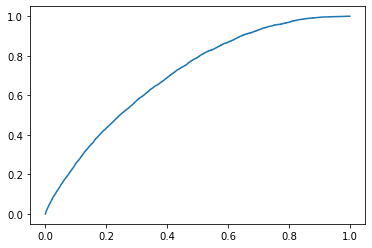

In [134]:
plt.plot(fpr,tpr,"-")

In [135]:
metrics.roc_auc_score(y_test,mod.predict_proba(X_test)[:,1])

0.7039749952156746

In [136]:
metrics.confusion_matrix(y_test,mod.predict(X_test))

array([[116662,      0],
       [  7276,      1]], dtype=int64)

In [137]:
print(metrics.classification_report(y_test,mod.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    116662
           1       1.00      0.00      0.00      7277

    accuracy                           0.94    123939
   macro avg       0.97      0.50      0.49    123939
weighted avg       0.94      0.94      0.91    123939



In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
clf1=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [140]:
clf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [141]:
clf1.oob_score_

0.9395486471112688

In [142]:
clf1.feature_importances_

array([0.00097417, 0.00135313, 0.00322171, 0.00079599, 0.0008467 ,
       0.00150793, 0.00074641, 0.00207308, 0.00067902, 0.00092046,
       0.00077609, 0.00098033, 0.00054213, 0.00165062, 0.0007765 ,
       0.0006774 , 0.00076341, 0.00107981, 0.00074205, 0.00065587,
       0.00047421, 0.00059556, 0.00093459, 0.0006656 , 0.00117994,
       0.00058545, 0.00061111, 0.00222862, 0.001488  , 0.00091597,
       0.00109971, 0.00074453, 0.00046421, 0.0017409 , 0.00083814,
       0.00062535, 0.00067284, 0.00056093, 0.00066934, 0.00066071,
       0.00075186, 0.00046711, 0.00077343, 0.00146918, 0.00092546,
       0.00168937, 0.00120025, 0.00096935, 0.00066762, 0.00089958,
       0.00061776, 0.00059316, 0.00216611, 0.00080579, 0.00065463,
       0.00063304, 0.00103948, 0.00111897, 0.00044363, 0.000874  ,
       0.00073758, 0.00132809, 0.00068229, 0.00090953, 0.00095065,
       0.00137108, 0.00081973, 0.00089369, 0.0009379 , 0.00105702,
       0.00066691, 0.00119608, 0.00102336, 0.00182603, 0.00186

In [143]:
imp_feat=pd.Series(clf1.feature_importances_)

In [144]:
imp_feat.sort_values(ascending=False)

831    0.005394
740    0.004871
134    0.004194
381    0.003900
472    0.003749
         ...   
629    0.000366
382    0.000362
897    0.000360
92     0.000339
166    0.000299
Length: 1000, dtype: float64

In [145]:
clf1.predict_proba(X_test)

[array([[0.025 , 0.975 ],
        [0.075 , 0.925 ],
        [0.    , 1.    ],
        ...,
        [0.05  , 0.95  ],
        [0.0375, 0.9625],
        [0.0625, 0.9375]]),
 array([[0.975 , 0.025 ],
        [0.925 , 0.075 ],
        [1.    , 0.    ],
        ...,
        [0.95  , 0.05  ],
        [0.9625, 0.0375],
        [0.9375, 0.0625]])]